# Hands on session - water molecule energy predictive model

### Read in the input files to generate training and test sets

The following block includes a function, read_blocks, which you can use to conveniently build your training and test sets. The function takes two arguments:

file_path, the directory containing your input files

num_blocks, the number of xyz-coordinate blocks to extract so that the function can read the coordinates and build the relevant descriptors for your machine learning model.

To determine the correct value of num_blocks, you should inspect the corresponding *.xyz files. For example, if you open H2O_test.xyz, you will see that it contains 250 blocks. Can you think of another way to work out the number of blocks?

There is also an additional function, read_energies, which extracts the water molecule energies from the *.ener files you provide.

In [ ]:
import numpy as np

def read_blocks(file_path, num_blocks):
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
        # Each block has 5 header lines + 3 data lines
        block_size = 5
        for i in range(num_blocks):
            start = i * block_size + 2  # Skip the first two header lines
            block_data = []
            
            for j in range(3):  # Read the three atom lines
                parts = lines[start + j].split()
                block_data.extend(map(float, parts[1:]))  # Store only the coordinates
                
            data.append(block_data)
    
    return np.array(data)


def read_energies(file_path):

    energies = []
    with open(file_path, 'r') as f:
        for line in f:
            energies.append(float(line))
    return np.array(energies) 

In [ ]:
# Enter the number of blocks here for the training set:
xyz_train = read_blocks('./data/H2O_unrotated.xyz', num_blocks)
xyz_test = read_blocks('./data/H2O_test.xyz', 250)

# Use the read_energies function to read in energies 

### Visualize the energy distribution

To get a sense of how the water molecule energies are spread across your training set, you can use the hist() function from Matplotlib’s pyplot module. A histogram is a great way to quickly check whether your energies cluster tightly, spread widely, or contain any unusual outliers.

In [ ]:
import matplotlib.pyplot as plt
# write the code for visualization here. 

### Preparing Your Data: Normalization Steps 
Before you start writing your ML code and training the model, take a moment to normalize your data — both the descriptors and the target values.
Use numpy.mean() and numpy.std() to compute the mean and standard deviation, and then apply normalization. It’s a good idea to write a small function that takes your datasets and returns the normalized versions.

While doing this, pay close attention to the dimensions of each dataset. Making sure they align correctly will save you trouble later on.

In [ ]:
def renorm(dataset):
    ## fill in the body of the function which normalizes the dataset
    ##
    return normal

norm_train = renorm(xyz_train)

### Building a simple neural network with Keras

Using Keras, try constructing a small multilayer neural network. How would you design it? Think about how many layers you want to include and how many nodes each layer should have. Feel free to mix different activation functions across layers to improve performance.

Beyond choosing the number of nodes and activation functions, what other hyperparameters can you tune? 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers

# Define the model
model = keras.Sequential([
    # stack your layers here. Remember to seperate them with a comma! 
])

### Define and evaluate your optimization setup

Choose an appropriate optimization method (for example, Adam or SGD) and set a sensible learning rate. Once your optimizer is defined, compile your model and print a model summary using the model.summary() command.

How many learnable parameters does your model have in total? Does this number match what you expected based on your chosen architecture?

In [ ]:
# Compile the model
model.compile(optimizer= , loss=, metrics= )

# Print model summary
model.summary()

### Train your model
Now that your model is defined and compiled, let’s move on to training. You can specify a batch size to help smooth out noise in the loss curve during training, and set an appropriate number of epochs.

After your initial training run, examine the results and adjust these values, either increasing or decreasing the batch size or number of epochs, to improve performance.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

### Evaluating Model Performance Using Training and Validation Loss

Use the loss and val_loss values from your model’s training history to plot and evaluate its performance on the training and test sets. Analyze the curves to determine whether they converge.
Convergence: Do the training and validation losses decrease and level off, indicating the model has learned effectively?

** Overfitting or Underfitting:**

If the training loss is low but the validation loss is high, the model may be overfitting.
If both losses remain high, the model may be underfitting.

Potential Improvements: Depending on the issue, you could:

Overfitting: Reduce model complexity, apply regularization, or increase the training data.
Underfitting: Increase model complexity, train for more epochs, or improve feature representation.

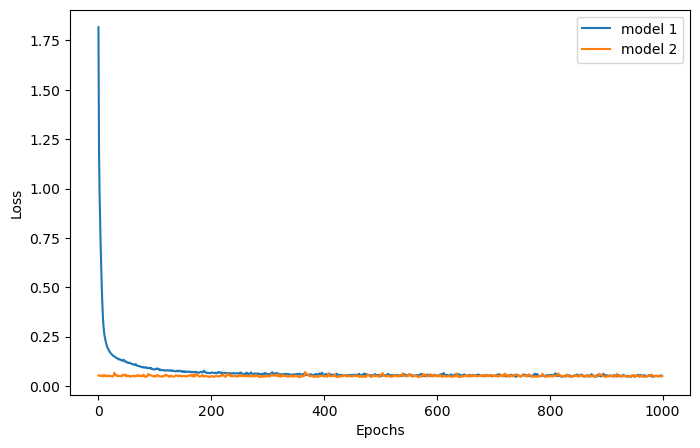

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Predicting Test Set Energies and Comparing with True Values

Now, use the trained model to predict the energies of the test set and plot them against the true target values. How well do the predictions match the actual values? Are the results satisfactory?

In [13]:
y_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

 1/44 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


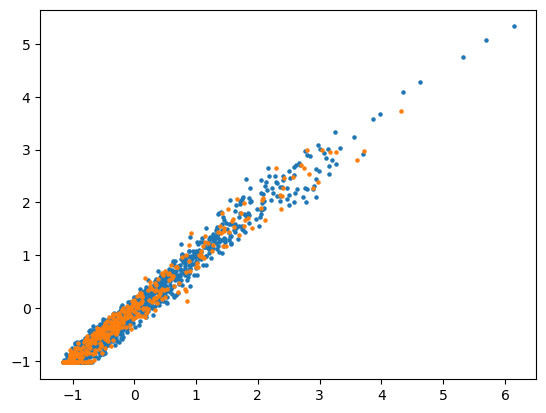

In [ ]:
plt.scatter(y_train, y_pred, label= 'test', alpha = 1, s=5)
plt.scatter(y_test, ytest_pred, label= 'test', alpha = 1, s=5)
plt.show()
